<a href="https://colab.research.google.com/github/Sobiii/Search-Engine-Design-G4/blob/Sobii/Sobs_Attempt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting Documents

## CISI ALL extraction

In [40]:
import os as os

# get the current working directory
notebook_dir = os.getcwd()

# define paths to CISI dataset files
cisi_all_path = os.path.join(notebook_dir, 'CISI.ALL')
cisi_qry_path = os.path.join(notebook_dir, 'CISI.QRY')
cisi_rel_path = os.path.join(notebook_dir, 'CISI.REL')

## Debugging round 2
changes:<br>
1) Code is now able to extract all tags and information correctly. The .X tag which according to kaggle is cross-referencing information/keywords has not been extracted since it doesnt seem useful/worth it and i cant make sense of what it means.

2) only 63 documents have source info .B
3) only 1 document has year info .Y 

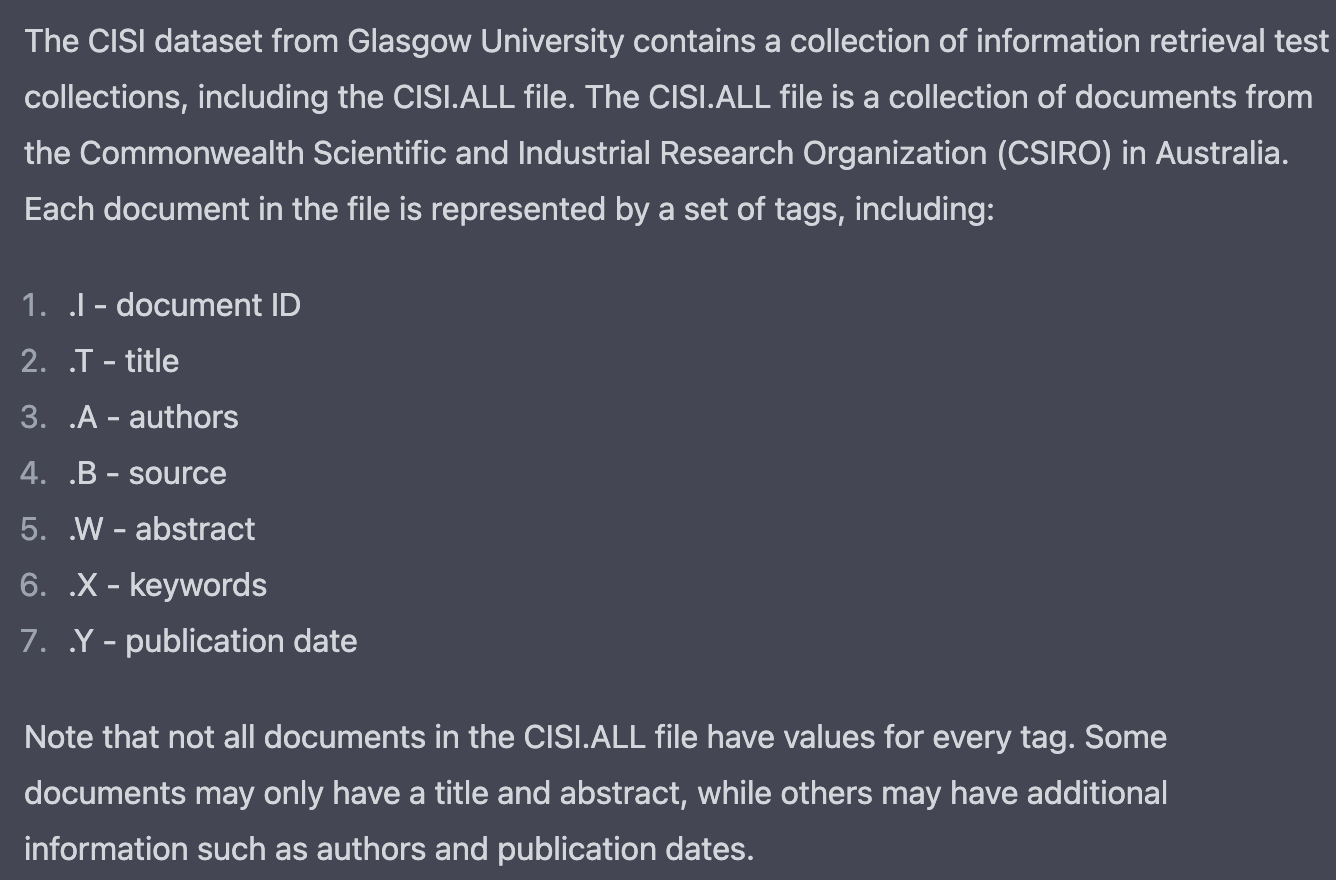

In [41]:
import re

def extraction(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    doc_ids = []
    documents = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            doc_id = file_lines[i].split()[1]
            doc_ids.append(doc_id)
            if file_lines[i+1].startswith(".T") and file_lines[i+3].startswith(".A"):
                title = file_lines[i+2][:].strip()
            else:
                title = file_lines[i+2].strip() + " " + file_lines[i+3].strip()
            authors = ""
            if any([line.startswith(".A") for line in file_lines[i+1:]]):
                author_start = i+4
                author_end = author_start
                while author_end < len(file_lines) and not any([file_lines[author_end].startswith(tag) for tag in [".T", ".B", ".W", ".Y"]]):
                    author_end += 1
                authors = " ".join([file_lines[j].strip() for j in range(author_start, author_end)]).strip()
                authors = re.sub(r"^\s*\.\s*A\s*", "", authors)
                abstract_start = author_end
            else:
                abstract_start = i+4

            for t in range(i+4, len(file_lines)):
                if file_lines[t].startswith(".X"):
                    abstract_end = t
                    break
            else:
                abstract_end = len(file_lines)
            abstract = " ".join(file_lines[abstract_start:abstract_end]).strip().replace('\n', ' ')
            abstract = re.sub(r"^\s*\.\s*W\s*", "", abstract)
            abstract = " ".join(abstract.split())
            source = re.search(r"\.B\s+(.*)\.W", abstract)
            if source:
                source = source.group(1)
                source = re.sub(r"^\s*\.\s*A\s*", "", source)
                source = re.sub(r"^\s*\.\s*B\s*", "", source)
            else:
                source = ""
            abstract = re.sub(r"^\s*\.\s*B\s*(.*)\.W", "", abstract)
            abstract = " ".join(abstract.split())
            year = re.search(r"\.Y\s+(\d{4})", abstract)
            if year:
                year = int(year.group(1))
            else:
                year = ""
            abstract = re.sub(r"^\s*\.\s*Y\s*\d{4}\s*", "", abstract)
            abstract = " ".join(abstract.split())
            documents.append({"document_id": doc_id, "title": title, "authors": authors, "abstract": abstract, "source": source, "year": year})
            i = abstract_end
        else:
            i += 1

    return documents


In [42]:
documents = extraction(cisi_all_path)
documents

[{'document_id': '1',
  'title': '18 Editions of the Dewey Decimal Classifications',
  'authors': 'Comaromi, J.P.',
  'abstract': "The present study is a history of the DEWEY Decimal Classification. The first edition of the DDC was published in 1876, the eighteenth edition in 1971, and future editions will continue to appear as needed. In spite of the DDC's long and healthy life, however, its full story has never been told. There have been biographies of Dewey that briefly describe his system, but this is the first attempt to provide a detailed history of the work that more than any other has spurred the growth of librarianship in this country and abroad.",
  'source': '',
  'year': ''},
 {'document_id': '2',
  'title': 'Use Made of Technical Libraries',
  'authors': 'Slater, M.',
  'abstract': 'This report is an analysis of 6300 acts of use in 104 technical libraries in the United Kingdom. Library use is only one aspect of the wider pattern of information use. Information transfer in 

## CISI QRY extraction

The following code is correct and works for the first 57 queries (1-57) how wever the remaining queiries have a different format and thus different code to extract those. Work on that next.

1) Possible approach is to split the CISI.QRY file into 2 and work with two different qry files. I think this is the easiet option. If all else fails just stick to the first files of 57.

# Extraction of first 57 Queries from CISI.QRY

In [43]:
# query extraction from CISI.QRY file (1st 57 queries only)
def extraction_query(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    queries_1 = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            query_id = int(file_lines[i][3:])
            if query_id > 57:
                break
            if file_lines[i+1].startswith(".W"):
                query_text = file_lines[i+2].strip()
                for t in range(i+3, len(file_lines)):
                    if file_lines[t].startswith(".I"):
                        break
                    query_text += " " + file_lines[t].strip()
            else:
                query_text = ""
            queries_1.append({"query_id": query_id, "query_text": query_text})
        i += 1

    return queries_1

In [44]:
queries_1 = extraction_query(cisi_qry_path)
queries_1

[{'query_id': 1,
  'query_text': 'What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from approximate titles? What is the usual relevance of the content of articles to their titles?'},
 {'query_id': 2,
  'query_text': 'How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information requests?'},
 {'query_id': 3,
  'query_text': 'What is information science?  Give definitions where possible.'},
 {'query_id': 4,
  'query_text': 'Image recognition and any other methods of automatically transforming printed text into computer-ready form.'},
 {'query_id': 5,
  'query_text': 'What special training will ordinary researchers and businessmen need for proper information management and unobstructed use of information retrieval systems? What problems are they likely to encounter?'},
 {'query_id': 6,
  'query_text': 'What possibilities 

# Extraction of remaining queries from CISI.QRY

In [45]:
# Can't remember but I think there is a possible bug in this code. Just stick with Sabrinas.

In [46]:
# query extraction from CISI.QRY file (58th query onwards)
def extraction_remaining_queries(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    queries = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            query_id = int(file_lines[i][3:])
            if query_id > 57:
                query_title = ""
                query_author = ""
                query_text = ""
                query_source = ""
                found_text_field = False
                found_source_field = False
                for t in range(i+1, len(file_lines)):
                    if file_lines[t].startswith(".I"):
                        break
                    elif file_lines[t].startswith(".T"):
                        query_title += file_lines[t][3:].strip()
                        # Check if the next line starts with .A and the line after that starts with .T
                        next_t = t+1
                        if next_t < len(file_lines) and file_lines[next_t].startswith(".A") and (next_t+1) < len(file_lines) and file_lines[next_t+1].startswith(".T"):
                            query_title += " " + file_lines[next_t].strip()
                            next_t += 1
                        # Check if the next line also contains title text
                        while next_t < len(file_lines) and not file_lines[next_t].startswith(".I") and not file_lines[next_t].startswith(".A") and not file_lines[next_t].startswith(".W") and not file_lines[next_t].startswith(".B"):
                            query_title += " " + file_lines[next_t].strip()
                            next_t += 1
                    elif file_lines[t].startswith(".A"):
                        query_author += file_lines[t][3:].strip()
                        # Check if the next line also contains author text
                        next_t = t+1
                        while next_t < len(file_lines) and not file_lines[next_t].startswith(".I") and not file_lines[next_t].startswith(".T") and not file_lines[next_t].startswith(".W") and not file_lines[next_t].startswith(".B"):
                            query_author += ", " + file_lines[next_t].strip()
                            next_t += 1
                    elif file_lines[t].startswith(".W"):
                        found_text_field = True
                        query_text = file_lines[t+1].strip()
                        for u in range(t+2, len(file_lines)):
                            if file_lines[u].startswith(".I") or file_lines[u].startswith(".B"):
                                break
                            query_text += " " + file_lines[u].strip()
                    elif file_lines[t].startswith(".B"):
                        found_source_field = True
                        query_source = file_lines[t][3:].strip()
                        for u in range(t+1, len(file_lines)):
                            if file_lines[u].startswith(".I"):
                                break
                            query_source += " " + file_lines[u].strip()
                    elif not found_text_field and not found_source_field:
                        # Assume any field that appears before the .W and .B field is either the title or author
                        if not query_title:
                            query_title = file_lines[t].strip()
                        elif not query_author:
                            query_author = file_lines[t].strip()
                queries.append({"query_id": query_id, "query_title": query_title, "query_author": query_author, "query_text": query_text, "query_source": query_source})
        i += 1

    return queries


In [47]:
queries_2 = extraction_remaining_queries(cisi_qry_path)
queries_2

[{'query_id': 58,
  'query_title': ' Directions in Library Networking',
  'query_author': 'Directions in Library Networking, Avram, H.D., McCallum, S.H.',
  'query_text': 'Bibliographic control before and after MARC is reviewed.  The capability of keying into online systems brought an interdependence among libraries, the service centers that mediate between them, and the large utilities that process and distribute data.  From this has developed the basic network structure among libraries in the United States.  The independent development of major networks has brought problems in standardization and coordination. The authors point out that while technology has led toward centralization of automated library services, new developments are now pushing toward decentralization.  Coordination is a requirement to avoid fragmentation in this new environment.',
  'query_source': ' (JASIS, Vol. 31, No. 6, November 1980, pp. 438-444) '},
 {'query_id': 59,
  'query_title': ' Performance Testing of 

# Pre-processing CISI.ALL data for corpus


The following code contains NLP preprocessing steps such as:

1.   Tokenizing
2.   Converting text to lowercase
3.   Removing stopwords
4.   Removing special characters, numbers, and punctuation marks

version 2:
uses the test.translate() methods to remove special characters, numbers, and punctuation marks.

This method is better than the simple regex as amny of the author names have commas and using regex left the inialts to be seperated. eg: j.p Morgan would turn into J P Morgan. the test.translate methods allows it to remain as JP Morgan when special characters are removed.

In [50]:
# Importing NLP preprocessing libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Creating corpus
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

documents = extraction(cisi_all_path)
corpus = []

for document in documents:
    text = ""
    if "title" in document and document["title"]:
        text += document["title"]
    if "authors" in document and document["authors"]:
        text += " " + document["authors"]
    if "abstract" in document and document["abstract"]:
        text += " " + document["abstract"]
    if text:  # only add non-empty strings to corpus
        # Remove special characters, numbers, and punctuation marks
        text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
        # Remove quotation marks
        text = text.replace("'", "").replace('"', '')
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        # Remove stop words
        filtered_text = [word for word in tokens if word not in stop_words]
        # Lemmatize words
        lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
        # Join tokens back to form a string
        preprocessed_text = ' '.join(lemmatized_text)
        corpus.append(preprocessed_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
print(corpus)

['edition dewey decimal classification comaromi jp present study history dewey decimal classification first edition ddc published eighteenth edition future edition continue appear needed spite ddc long healthy life however full story never told biography dewey briefly describe system first attempt provide detailed history work spurred growth librarianship country abroad', 'use made technical library slater report analysis act use technical library united kingdom library use one aspect wider pattern information use information transfer library restricted use document take account document used outside library still le information transferred orally person person library act channel proportion situation information transferred taking technical information transfer whole doubt proportion major one user technical information particularly technology rather science visit library rarely relying desk collection handbook current periodical personal contact colleague people organization even reg

# Indexing documents